In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
# 使用l1或l2正则化
from tensorflow.keras.regularizers import l1,l2

/Users/qin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# 载入数据集
mnist = tf.keras.datasets.mnist
# 载入训练集和测试集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 对训练集和测试集的数据进行归一化处理，有助于提升模型训练速度
x_train, x_test = x_train / 255.0, x_test / 255.0
# 把训练集和测试集的标签转为独热编码
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

# 模型定义，model1使用l2正则化
# l2(0.0003)表示使用l2正则化，正则化系数为0.0003
model1 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units=200,activation='tanh',kernel_regularizer=l2(0.0003)),
        Dense(units=100,activation='tanh',kernel_regularizer=l2(0.0003)),
        Dense(units=10,activation='softmax',kernel_regularizer=l2(0.0003))
        ])

# 在定义一个一模一样的模型用于对比测试，model2不使用正则化
model2 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(units=200,activation='tanh'),
        Dense(units=100,activation='tanh'),
        Dense(units=10,activation='softmax')
        ])

# sgd定义随机梯度下降法优化器
# loss='categorical_crossentropy'定义交叉熵代价函数
# metrics=['accuracy']模型在训练的过程中同时计算准确率
sgd = SGD(0.2)
model1.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 传入训练集数据和标签训练模型
# 周期大小为30（把所有训练集数据训练一次称为训练一个周期）
epochs = 30
# 批次大小为32（每次训练模型传入32个数据进行训练）
batch_size=32
# 先训练model1
history1 = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))
# 再训练model2
history2 = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4083 - accuracy: 0.9208 - val_loss: 0.2928 - val_accuracy: 0.9525
Epoch 2/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2626 - accuracy: 0.9601 - val_loss: 0.2285 - val_accuracy: 0.9662
Epoch 3/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2190 - accuracy: 0.9680 - val_loss: 0.2066 - val_accuracy: 0.9712
Epoch 4/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1946 - accuracy: 0.9725 - val_loss: 0.1974 - val_accuracy: 0.9706
Epoch 5/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1802 - accuracy: 0.9754 - val_loss: 0.1919 - val_accuracy: 0.9706
Epoch 6/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1697 - accuracy: 0.9772 - val_loss: 0.1784 - val_accuracy: 0.9731
Epoch 7/30
60000/60000 [==============================] 

Epoch 25/30
60000/60000 [==============================] - 3s 51us/sample - loss: 6.5328e-04 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9816
Epoch 26/30
60000/60000 [==============================] - 3s 52us/sample - loss: 6.1766e-04 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9817
Epoch 27/30
60000/60000 [==============================] - 3s 52us/sample - loss: 5.8027e-04 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9819
Epoch 28/30
60000/60000 [==============================] - 3s 50us/sample - loss: 5.5010e-04 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9811
Epoch 29/30
60000/60000 [==============================] - 3s 47us/sample - loss: 5.1791e-04 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9818
Epoch 30/30
60000/60000 [==============================] - 3s 49us/sample - loss: 4.9372e-04 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9817


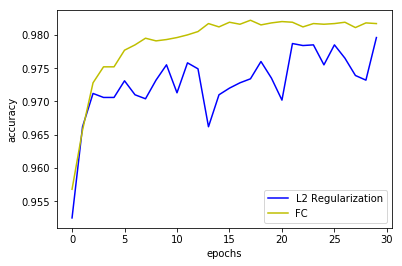

In [4]:
# 画出model1验证集准确率曲线图
plt.plot(np.arange(epochs),history1.history['val_accuracy'],c='b',label='L2 Regularization')
# 画出model2验证集准确率曲线图
plt.plot(np.arange(epochs),history2.history['val_accuracy'],c='y',label='FC')
# 图例
plt.legend()
# x坐标描述
plt.xlabel('epochs')
# y坐标描述
plt.ylabel('accuracy')
# 显示图像
plt.show()